In [5]:
%matplotlib inline 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sunpy.time import parse_time

# Create a train/test dataset for flare events

In [7]:
def get_relevant_lightcurve_goes(start_time, end_time, lightcurve, a = True):
    lightcurve_search = lightcurve.ix[lightcurve['date']>=start_time]
    lightcurve_search = lightcurve_search.ix[lightcurve_search['date']<=end_time]
    return lightcurve_search

In [8]:
#first calls to get lightcurves (saved locally)


lightcurve_goes = pd.read_csv('raw_GOES_lightcurves.csv', delimiter = ',', header = 0)

lightcurve_goes['date'] = map(parse_time, lightcurve_goes['date'])



In [9]:
events = pd.read_csv('prepped_GOES.csv', delimiter=',', header=0)
events['event_starttime'] = map(parse_time, events['event_starttime'])
events['event_endtime'] = map(parse_time, events['event_endtime'])
events['event_peaktime'] = map(parse_time, events['event_peaktime'])
start_date = datetime.datetime(2011, 3, 1)
events = events.ix[events['event_starttime']>=start_date]

In [29]:
print lightcurve_goes.iloc[-1]

date    2011-03-25 22:23:02
xrsa                  1e-09
xrsb               4.22e-07
Name: 1048574, dtype: object


In [60]:
def response_sequence():
    validResponse = False
    while validResponse==False:
        response = raw_input('Is this an event? ')
        if response=='1':
            evalu = 'ideal flare'
            validResponse = True
        elif response=='2':
            evalu = 'no flare'
            validResponse = True
        elif response=='3':
            response = raw_input('Add note: ')
            if response != None:
                evalu = response
                response = 3
                validResponse = True
        elif response=='4':
            evalu = 'flare but timing off'
        else:
            print 'Oops! Not a valid response. Please try again.'
    return evalu, response

In [61]:
def create_test_set(n, events, lightcurve_goes, delta_t, folder):
    skips_between_events = (events.shape[0])/n
    j = 0
    none_list = [None for k in range(events.shape[0])]
    events.loc[:, 'verdict'] = none_list  
    for elem in events['event_starttime']:
        if j%skips_between_events==0:
            numprinting = j/skips_between_events
            print '%d / % d' %(numprinting, n)
            plt.title('Light Curve')
            yLabel = r'Flux [$W/m^2$]'
            delta_t = np.timedelta64(delta_t, 'm')
            start = elem - delta_t
            end = events['event_endtime'].values[j] + delta_t
            lightcurve = get_relevant_lightcurve_goes(start, end, lightcurve_goes)

            if lightcurve.shape[0] != 0:
                minutesX = ((lightcurve['date'] - events['event_starttime'].values[j])*10**(-9))
                minutesX = map(lambda x: x/np.timedelta64(1, 'ns'), minutesX)
                plt.plot(minutesX, lightcurve['xrsb'], color = 'black')
                plt.ylabel(r'Flux [$W/m^2$]')
                plt.xlabel('Time [s]')
                plt.axvline(0, ls='--', color='r')
                endX = (((events['event_endtime'].values[j]-events['event_starttime'].values[j])*10**(-9))/
                        np.timedelta64(1, 'ns'))
                plt.axvline(endX, ls='--', color='r')
                plt.show()
                text, verdict = response_sequence()
                title = 'Classified as: ' + text
                plt.title(title)
                plt.plot(minutesX, lightcurve['xrsb'], color = 'black')
                plt.ylabel(r'Flux [$W/m^2$]')
                plt.xlabel('Time [s]')
                plt.axvline(0, ls='--', color='r')
                plt.axvline(endX, ls='--', color='r')
                fNameSave = folder + '/' + str(j)
                plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 1)
                plt.close()
            else:
                verdict = 5 #'no data'
                
        events['verdict'].values[j] = verdict     
        j+=1
    events.to_csv('sklearn_goes.csv', index=False, columns=['SOL_standard', 'event_starttime', 'event_endtime',
                                                               'verdict'])


0 /  200


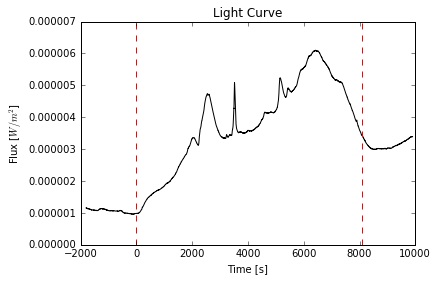

Is this an event? 1
1 /  200


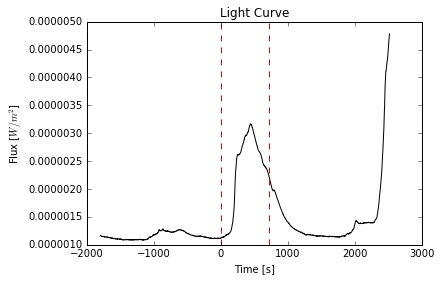

Is this an event? 1
2 /  200


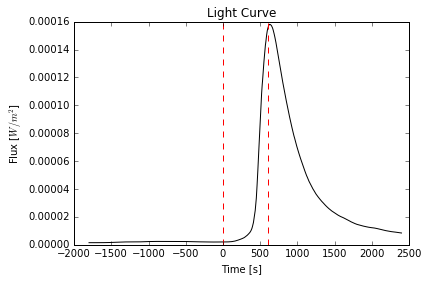

Is this an event? 3
Add note: ends at peak
3 /  200


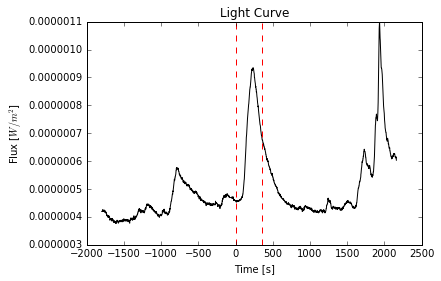

Is this an event? 1
4 /  200


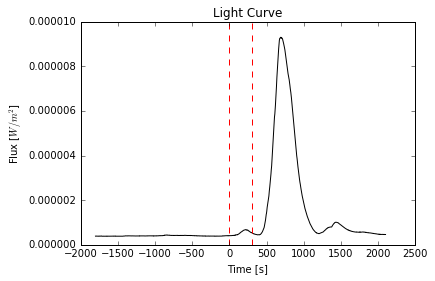

Is this an event? 3
Add note: not really, much larger event 500 s later
5 /  200


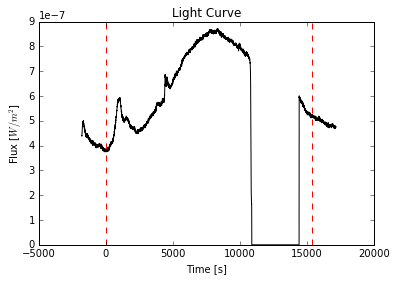

Is this an event? 3
Add note: data drop oit
6 /  200


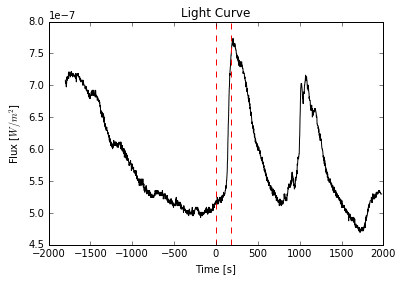

Is this an event? 3
Add note: ends at peak time
7 /  200


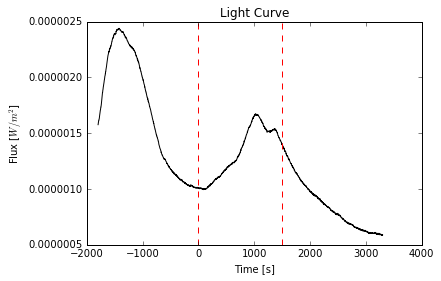

Is this an event? 3
Add note: secondary peak
8 /  200


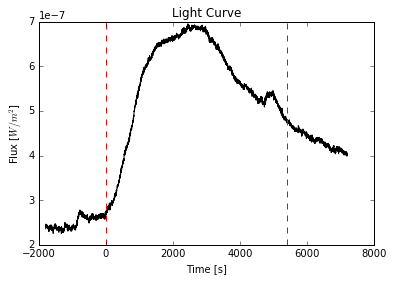

Is this an event? 1
9 /  200


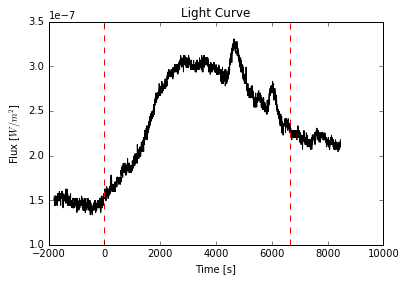

Is this an event? 1
10 /  200


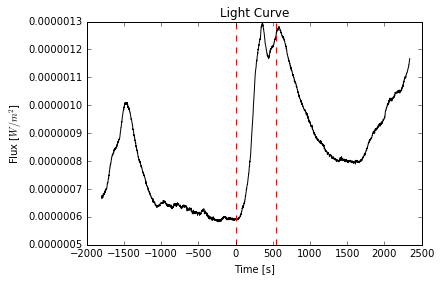

Is this an event? 3
Add note: ends by peak flux
11 /  200


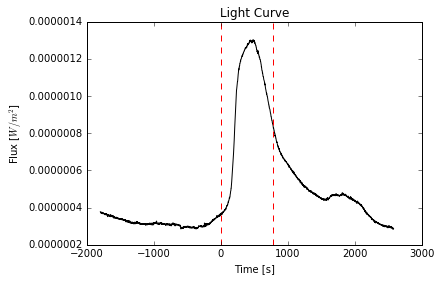

Is this an event? 1
12 /  200


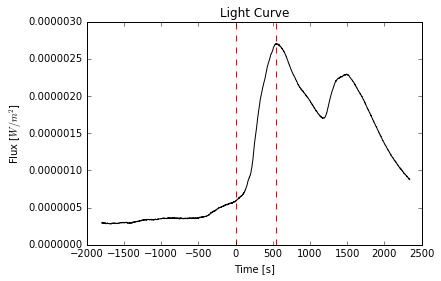

Is this an event? 3
Add note: ends on peak
13 /  200


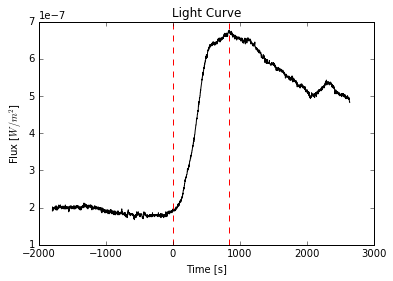

Is this an event? 3
Add note: ends on peak
14 /  200


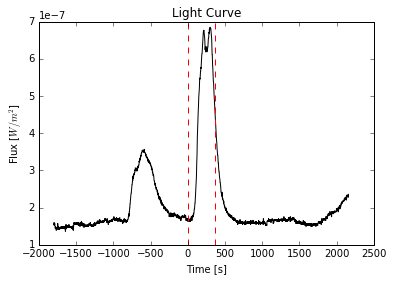

Is this an event? 1
15 /  200


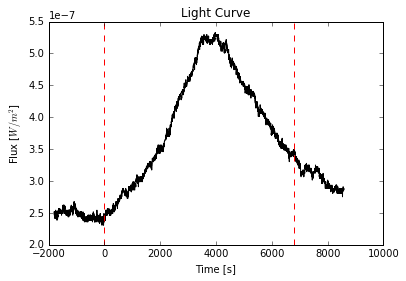

Is this an event? 1
16 /  200


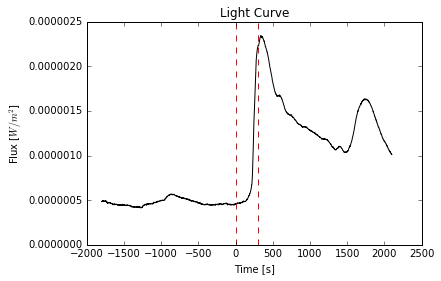

Is this an event? 3
Add note: ends at peak
17 /  200


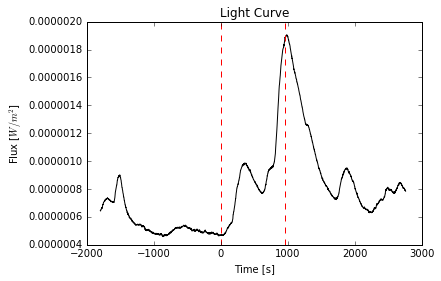

Is this an event? 3
Add note: eap
18 /  200


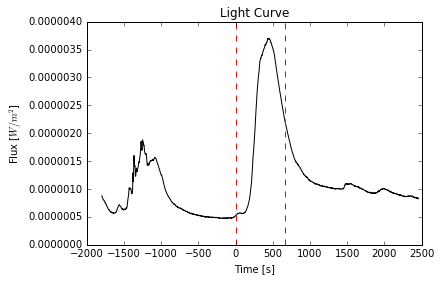

Is this an event? 1
19 /  200


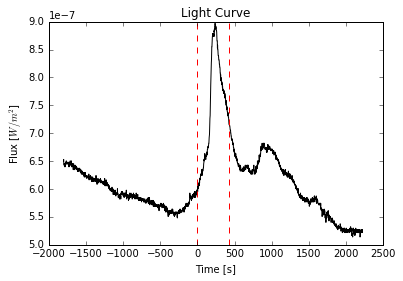

Is this an event? 1
20 /  200


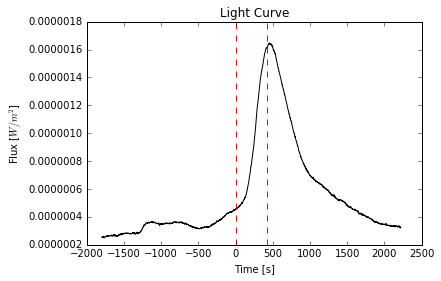

Is this an event? 3
Add note: eap
21 /  200


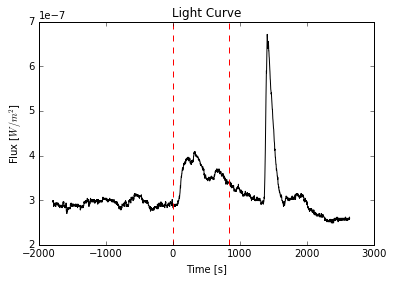

Is this an event? 3
Add note: possibly, sharper event 1500 s after
22 /  200


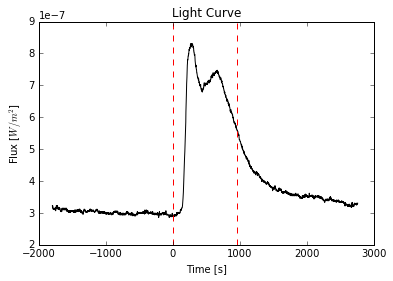

Is this an event? 1
23 /  200


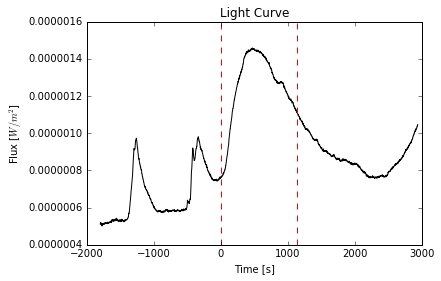

Is this an event? 1
24 /  200


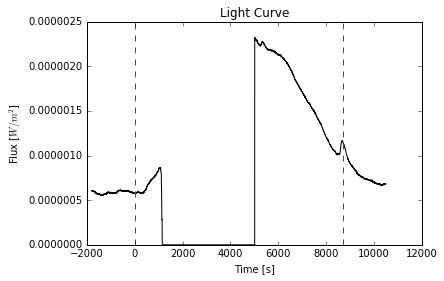

Is this an event? 3
Add note: yes but data dropout
25 /  200


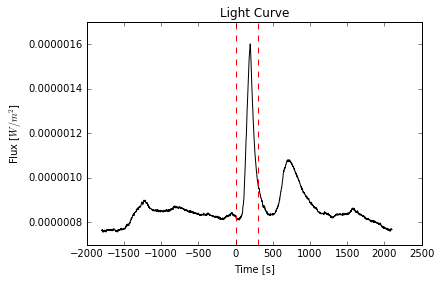

Is this an event? 1
26 /  200


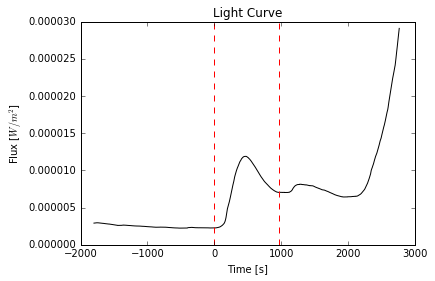

Is this an event? 1
27 /  200


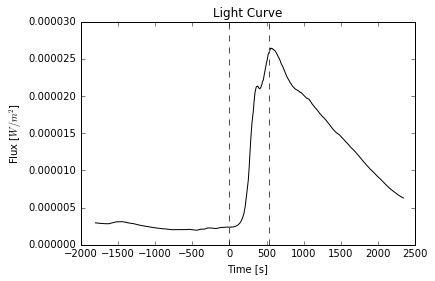

Is this an event? 3
Add note: eap
28 /  200


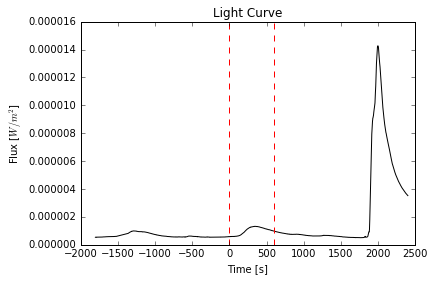

Is this an event? 3
Add note: no but event 1800 s later
29 /  200


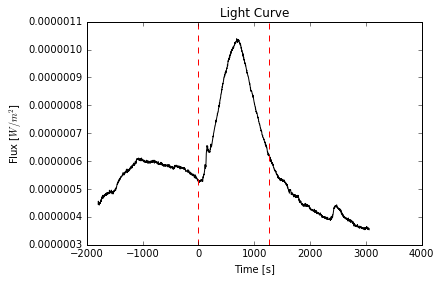

Is this an event? 1
30 /  200


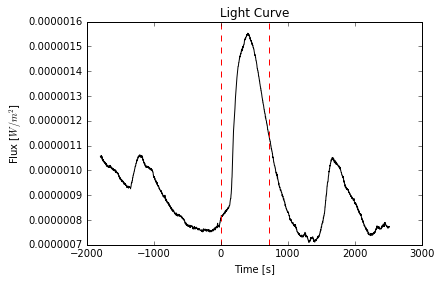

Is this an event? 1
31 /  200


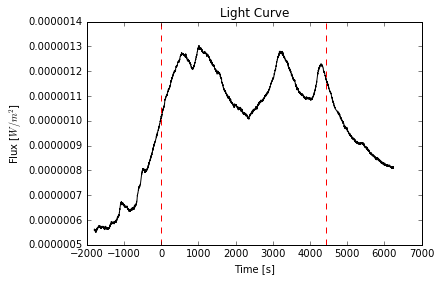

Is this an event? 1
32 /  200


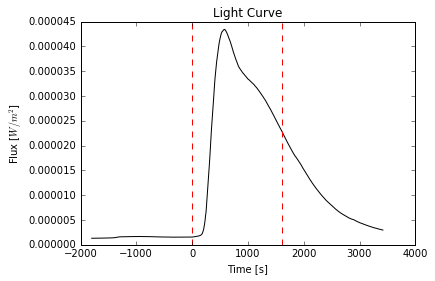

Is this an event? 1
33 /  200


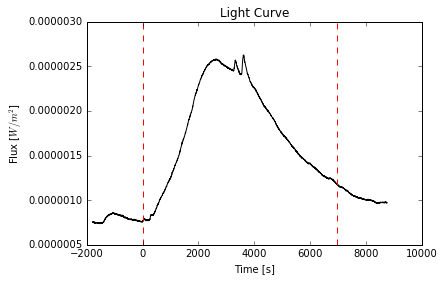

Is this an event? 1
34 /  200


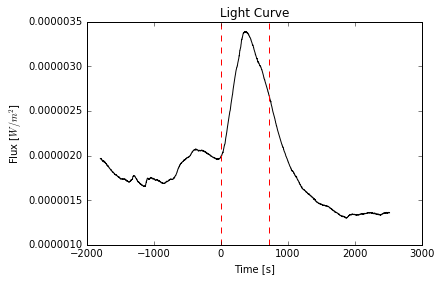

Is this an event? 1
35 /  200


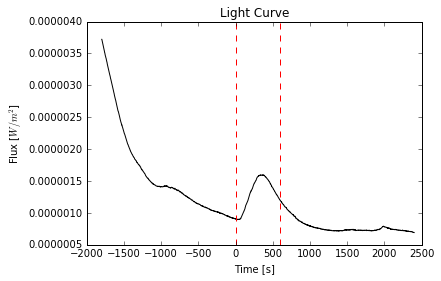

Is this an event? 1
36 /  200


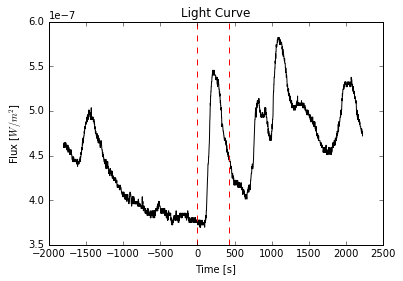

Is this an event? 1
37 /  200


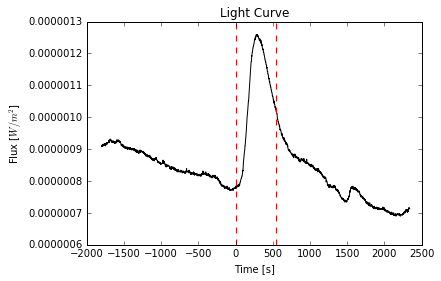

Is this an event? 1
38 /  200


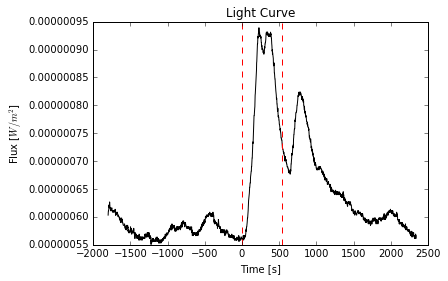

Is this an event? 1
39 /  200


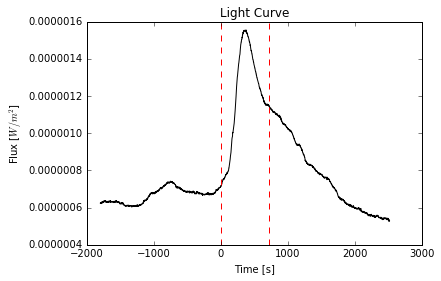

Is this an event? 1
40 /  200


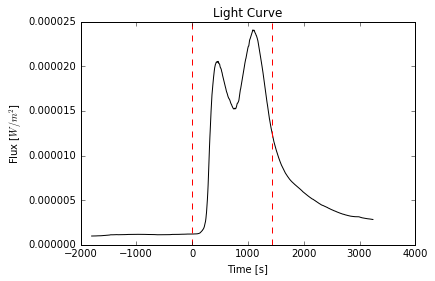

Is this an event? 1
41 /  200


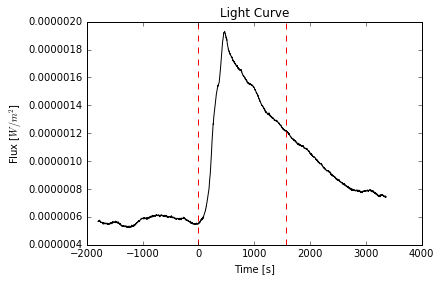

Is this an event? 1
42 /  200


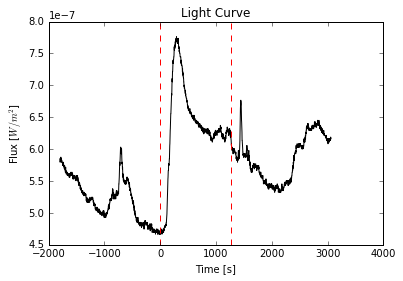

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
43 /  200


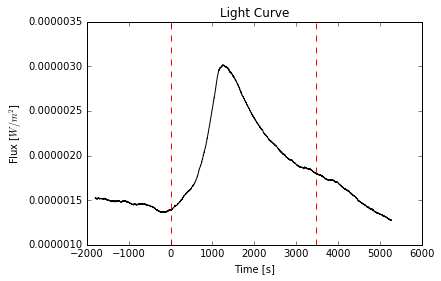

Is this an event? 1
44 /  200


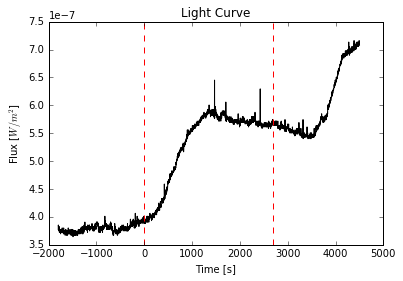

Is this an event? 2
45 /  200


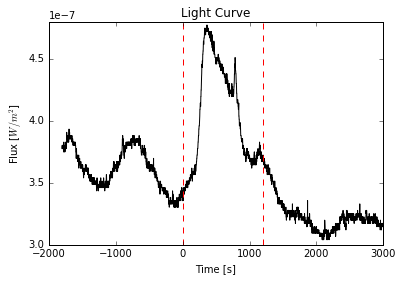

Is this an event? 1
46 /  200


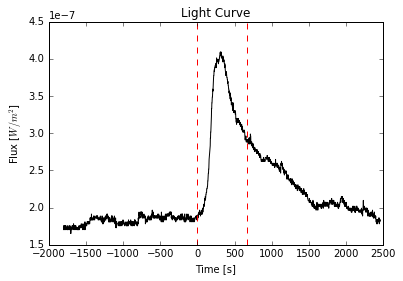

Is this an event? 1
47 /  200


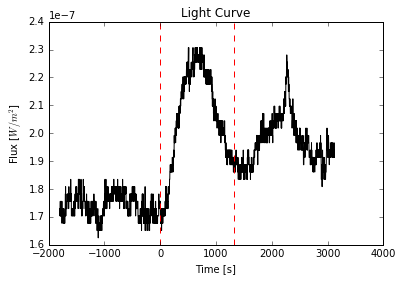

Is this an event? 1
48 /  200


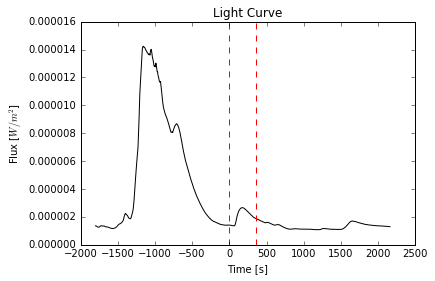

Is this an event? 3
Add note: real event 1000 s before
49 /  200


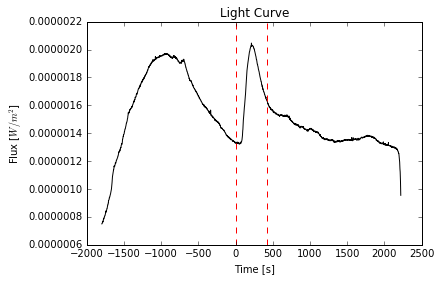

Is this an event? 3
Add note: second part of a larger event
50 /  200


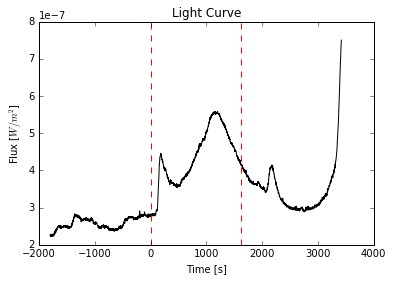

Is this an event? 1
51 /  200


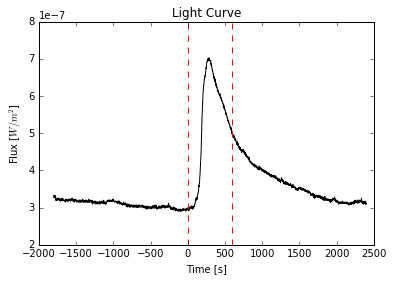

Is this an event? 1
52 /  200


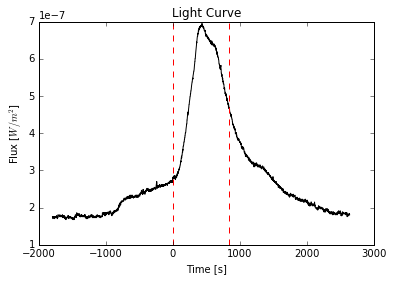

Is this an event? 1
53 /  200


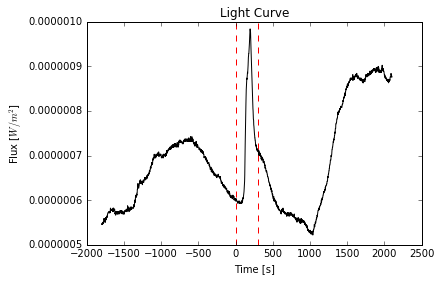

Is this an event? 1
54 /  200


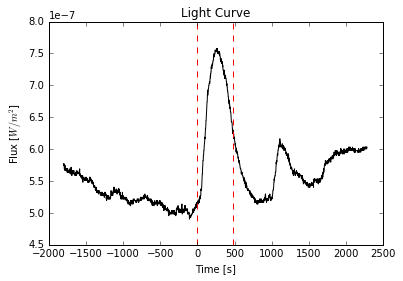

Is this an event? 1
55 /  200


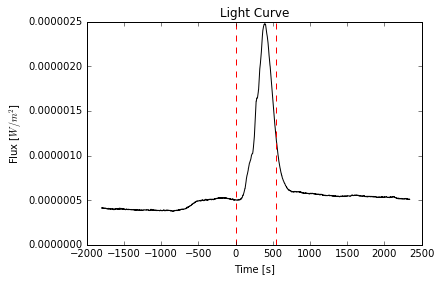

Is this an event? 1
56 /  200


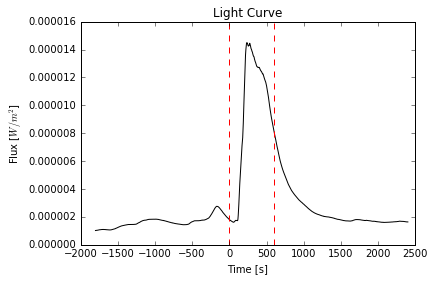

Is this an event? 1
57 /  200


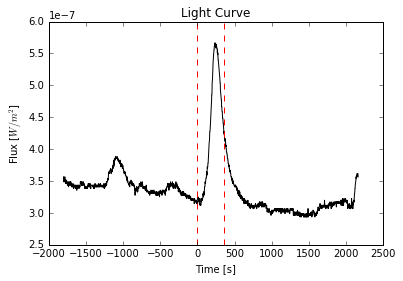

Is this an event? 1
58 /  200


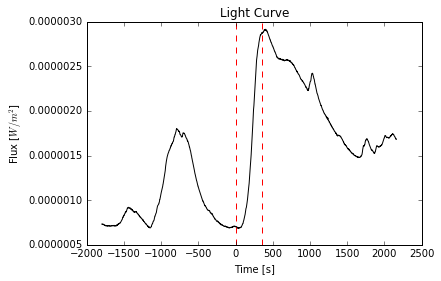

Is this an event? 3
Add note: eap
59 /  200


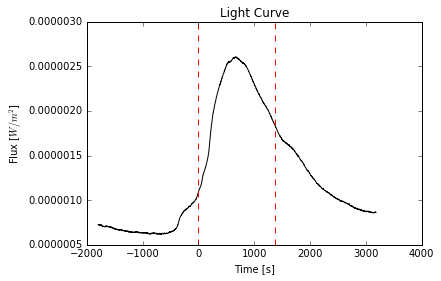

Is this an event? 1
60 /  200


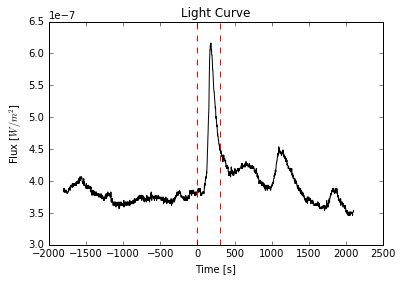

Is this an event? 1
61 /  200


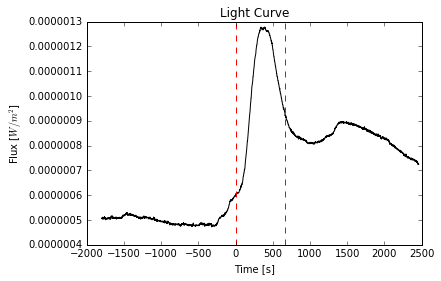

Is this an event? 1
62 /  200


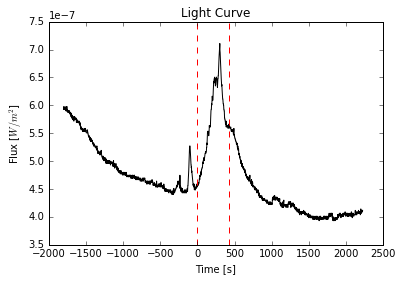

Is this an event? 1
63 /  200


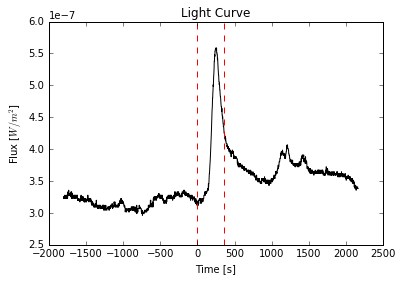

Is this an event? 1
64 /  200


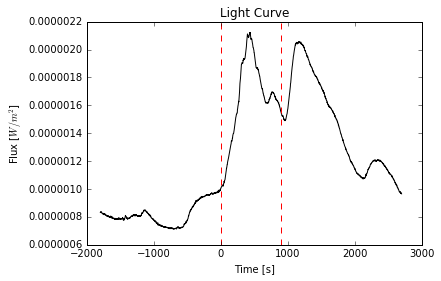

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 3
Add note: event still continues
65 /  200


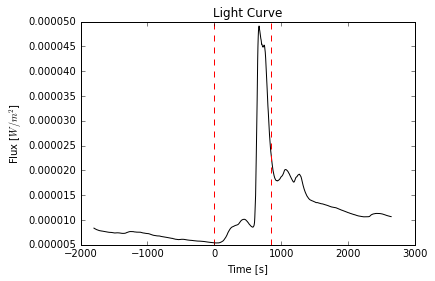

Is this an event? 1
66 /  200


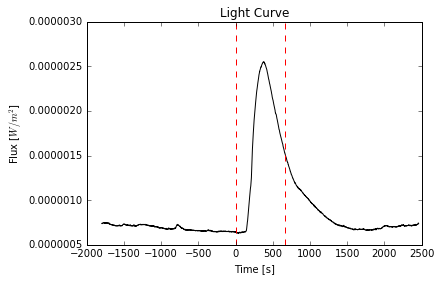

Is this an event? 1
67 /  200


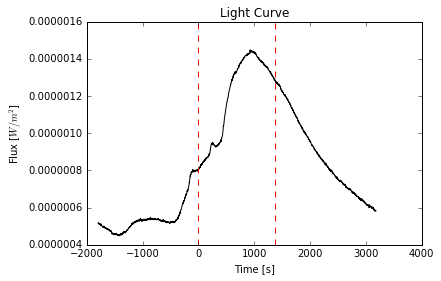

Is this an event? 1
68 /  200


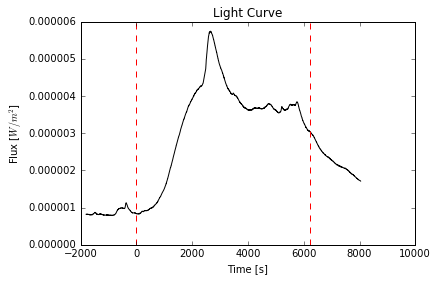

Is this an event? 1
69 /  200


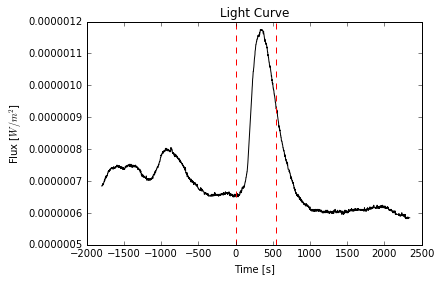

Is this an event? 1
70 /  200


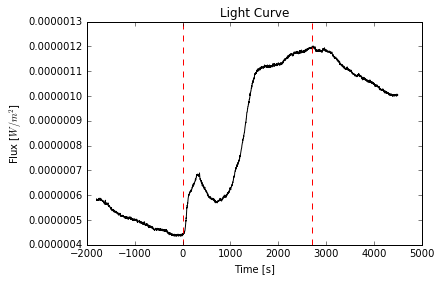

Is this an event? 3
Add note: eap
71 /  200


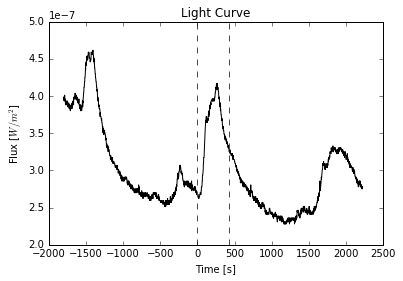

Is this an event? 1
72 /  200


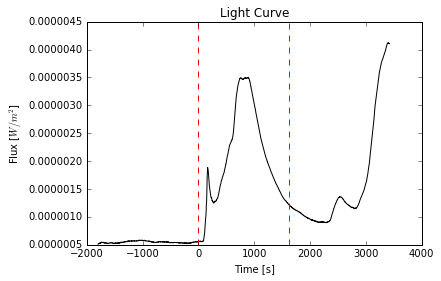

Is this an event? 1
73 /  200


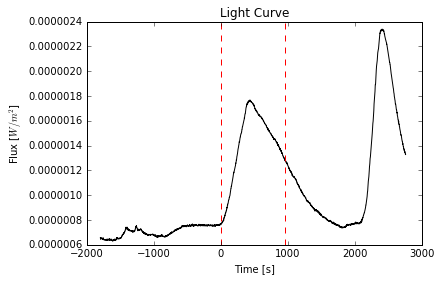

Is this an event? 1
74 /  200


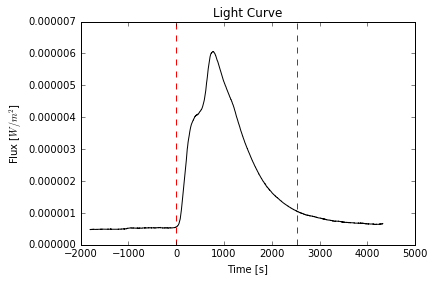

Is this an event? 1
75 /  200


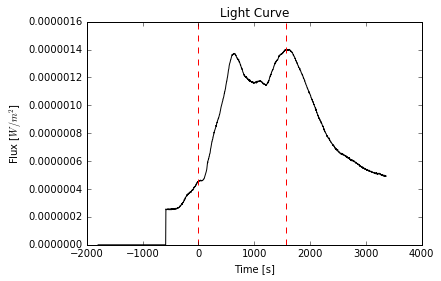

Is this an event? 3
Add note: drop out of data before, also eap
76 /  200


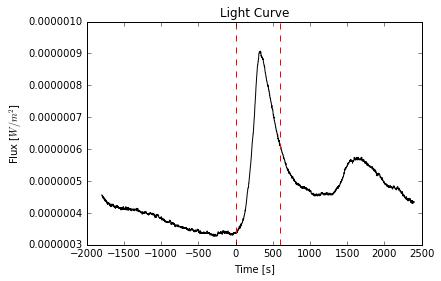

Is this an event? 1
77 /  200


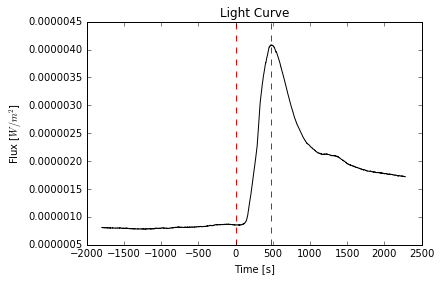

Is this an event? 3
Add note: eap
78 /  200


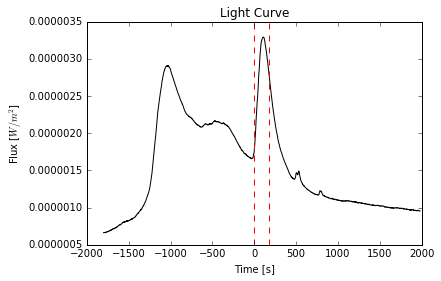

Is this an event? 3
Add note: end of event..looks like an event on its on right though
79 /  200


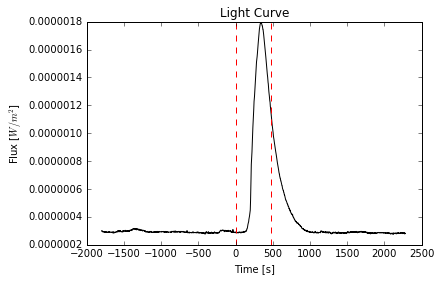

Is this an event? 1
80 /  200


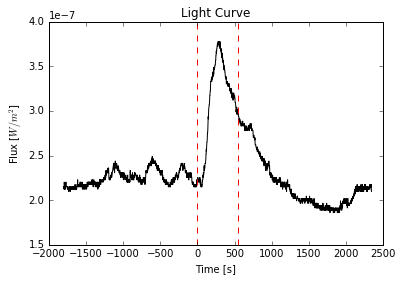

Is this an event? 1
81 /  200


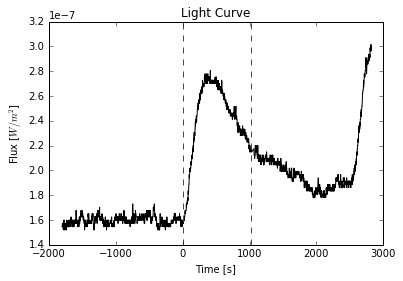

Is this an event? 1
82 /  200


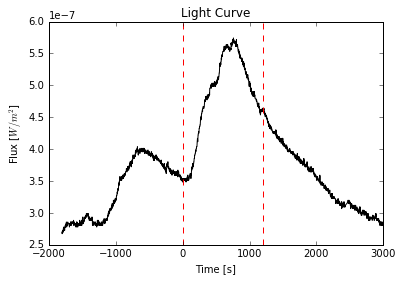

Is this an event? 1
83 /  200


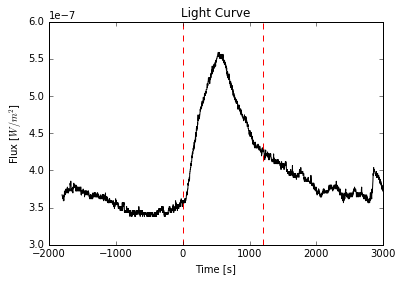

Is this an event? 1
84 /  200


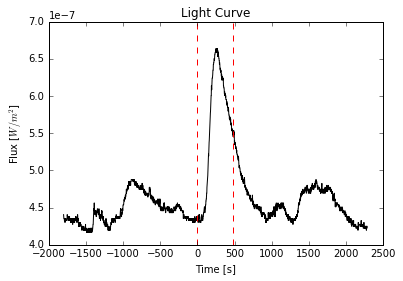

Is this an event? 1
85 /  200


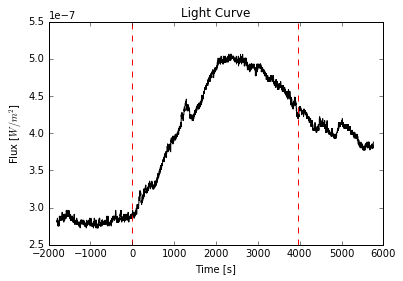

Is this an event? 1
86 /  200


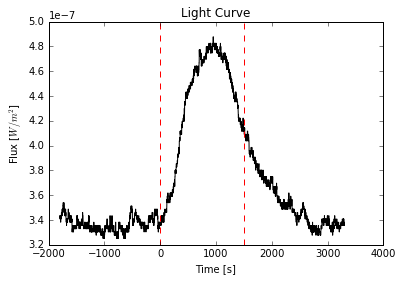

Is this an event? 1
87 /  200


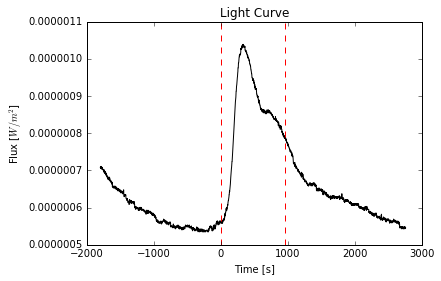

Is this an event? 1
88 /  200


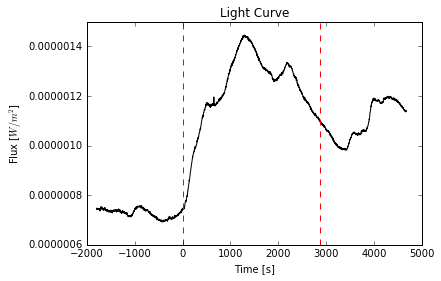

Is this an event? 1
89 /  200


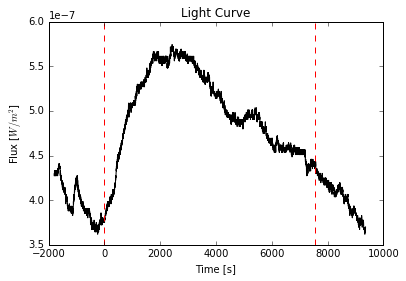

Is this an event? 1
90 /  200


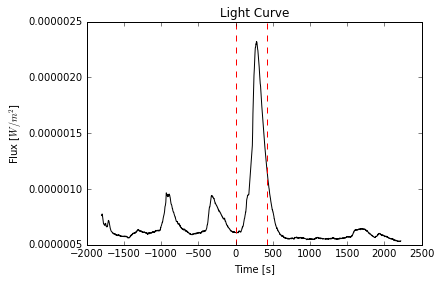

Is this an event? 1
91 /  200


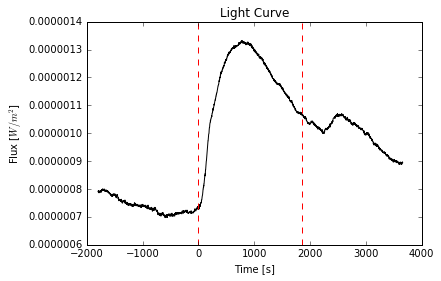

Is this an event? 1
92 /  200


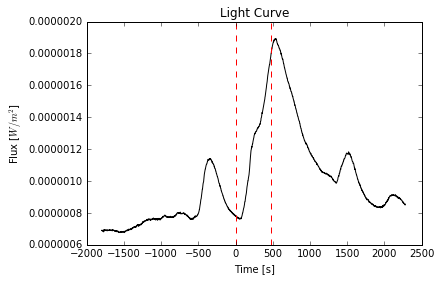

Is this an event? 3
Add note: eap
93 /  200


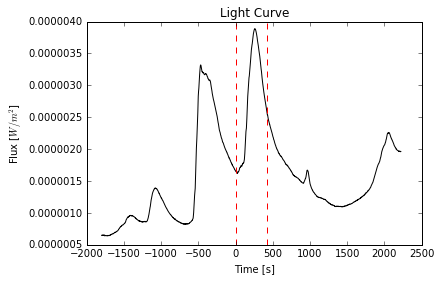

Is this an event? 3
Add note: yes but missing first half of event
94 /  200


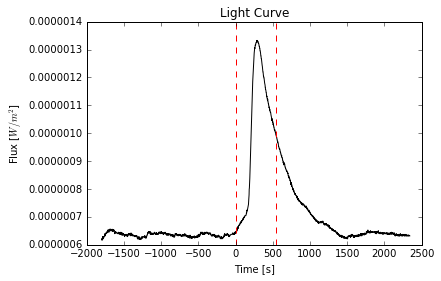

Is this an event? 1
95 /  200


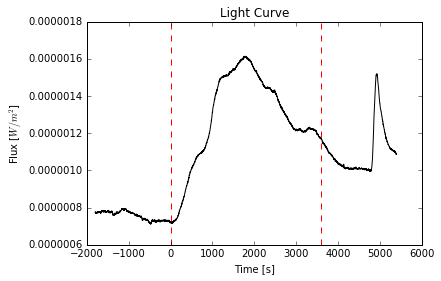

Is this an event? 1
96 /  200


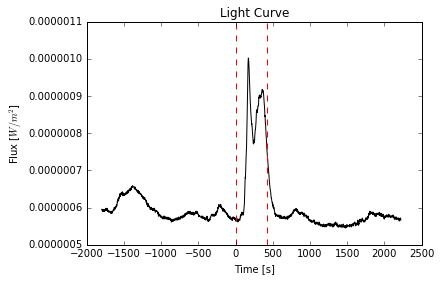

Is this an event? 1
97 /  200


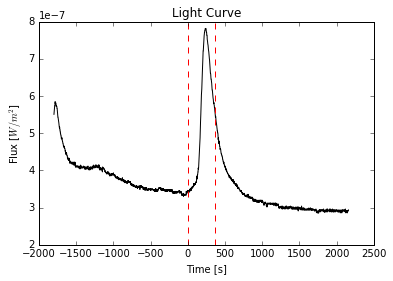

Is this an event? 1
98 /  200


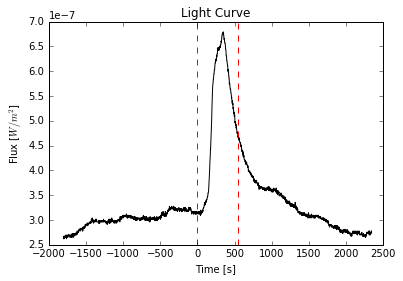

Is this an event? 1
99 /  200


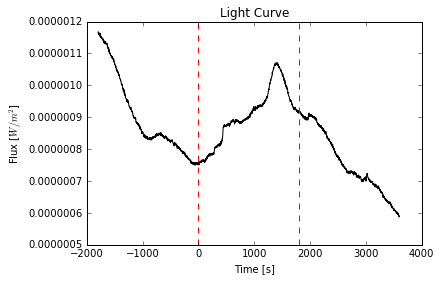

Is this an event? 2
100 /  200


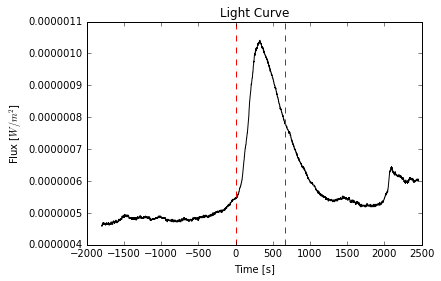

Is this an event? 1
101 /  200


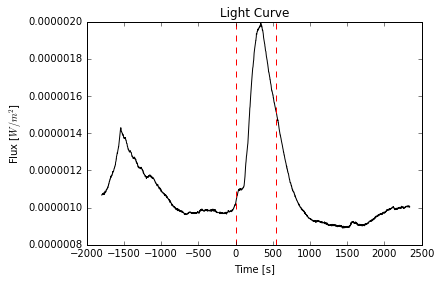

Is this an event? 1
102 /  200


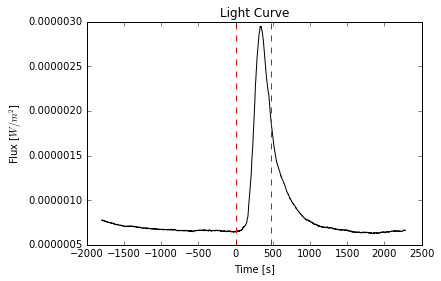

Is this an event? 1
103 /  200


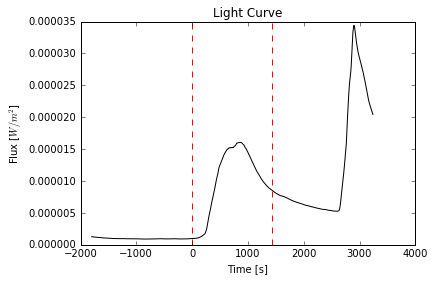

Is this an event? 1
104 /  200


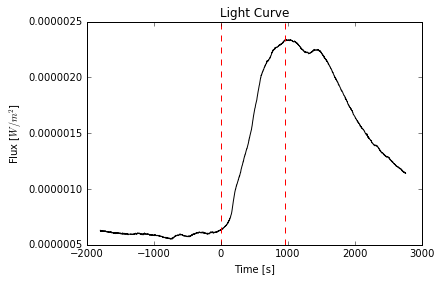

Is this an event? 3
Add note: eap
105 /  200


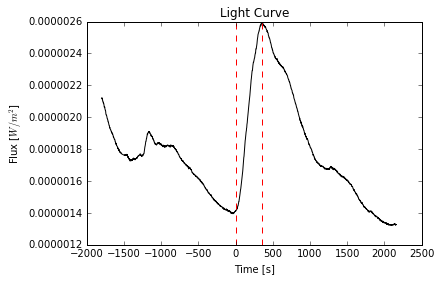

Is this an event? 3
Add note: eap
106 /  200


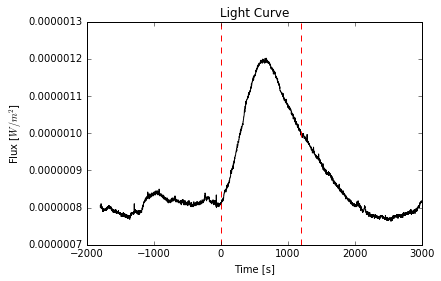

Is this an event? 1
107 /  200


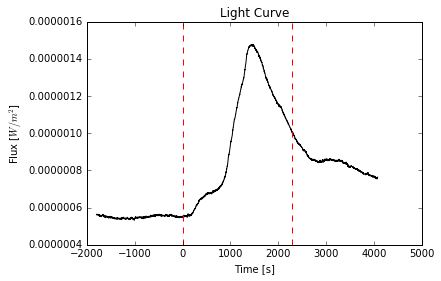

Is this an event? 1
108 /  200


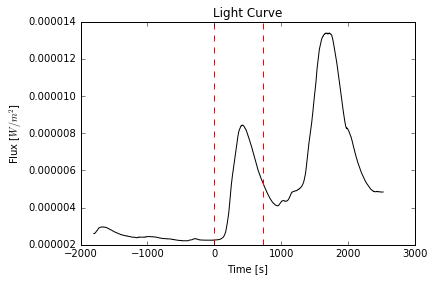

Is this an event? 3
Add note: yes and another follows it
109 /  200


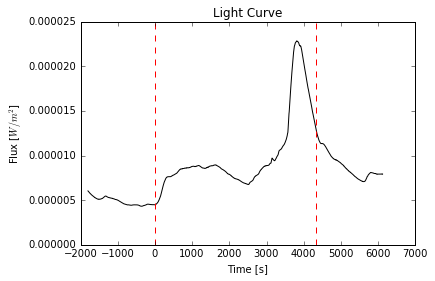

Is this an event? 1
110 /  200


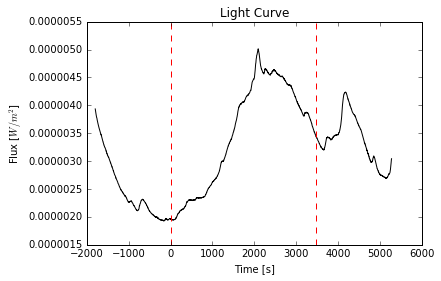

Is this an event? 2
111 /  200


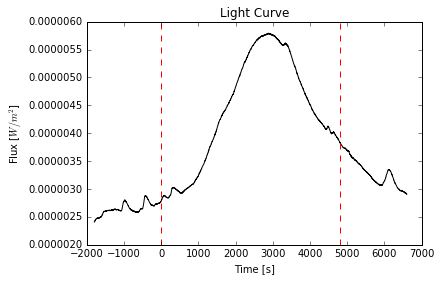

Is this an event? 1
112 /  200


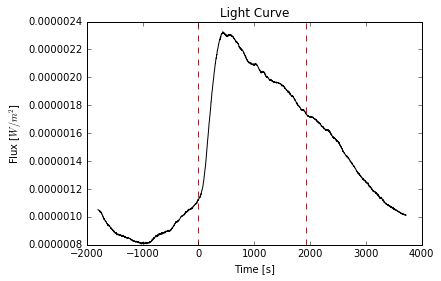

Is this an event? 1
113 /  200


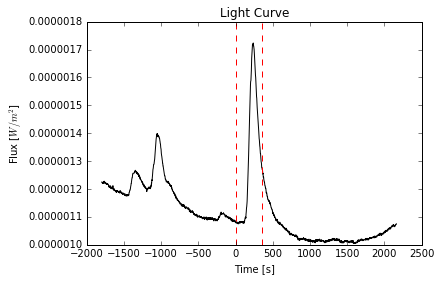

Is this an event? 1
114 /  200


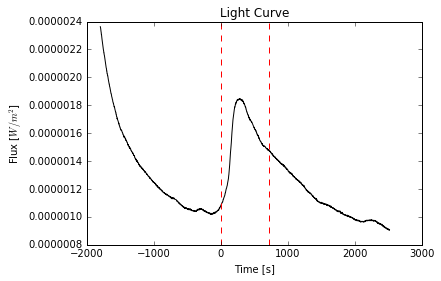

Is this an event? 1
115 /  200


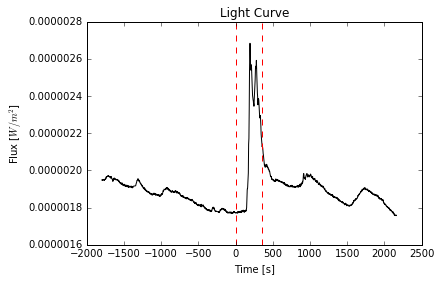

Is this an event? 1
116 /  200


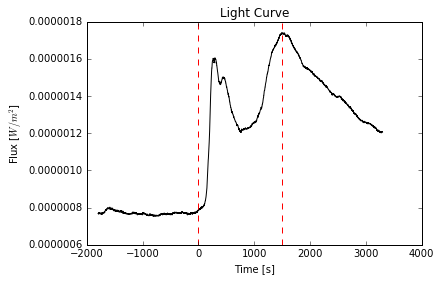

Is this an event? 3
Add note: eap
117 /  200


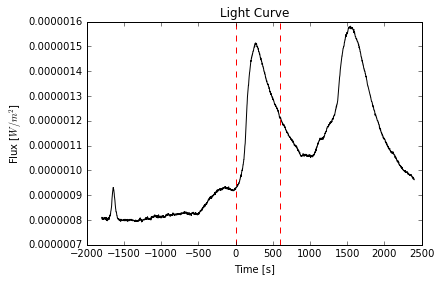

Is this an event? 1
118 /  200


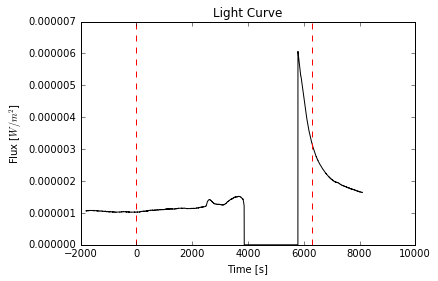

Is this an event? 3
Add note: probably but data dropout
119 /  200


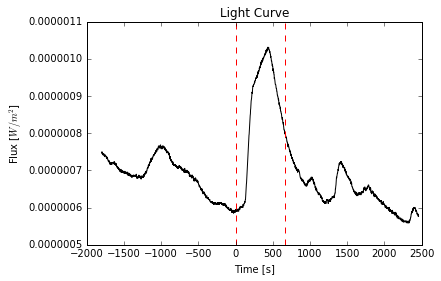

Is this an event? 1
120 /  200


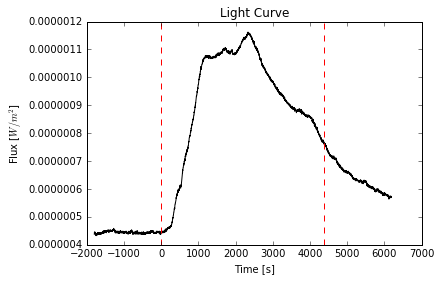

Is this an event? 1
121 /  200


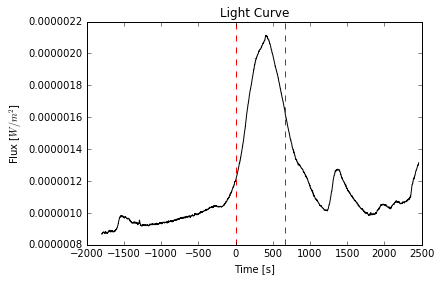

Is this an event? 1
122 /  200


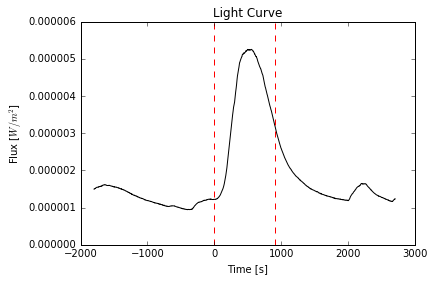

Is this an event? 1
123 /  200


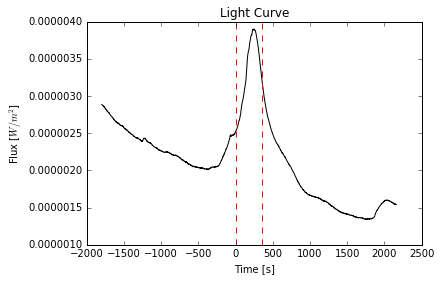

Is this an event? 1
124 /  200


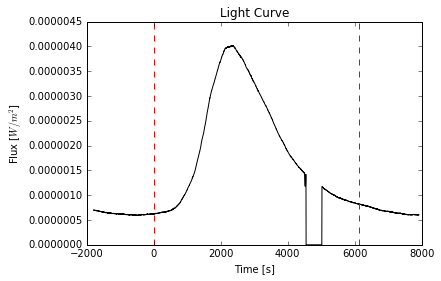

Is this an event? 1
125 /  200


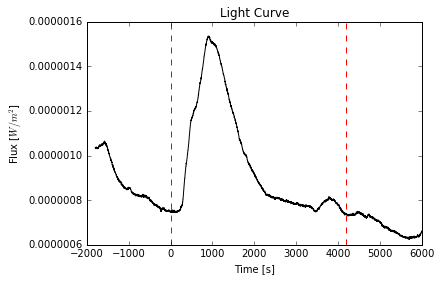

Is this an event? 1
126 /  200


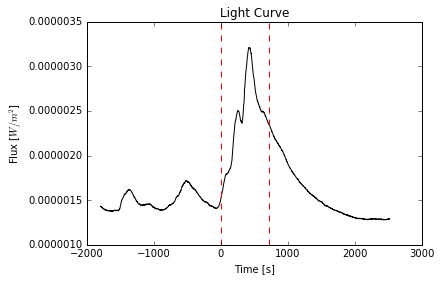

Is this an event? 1
127 /  200


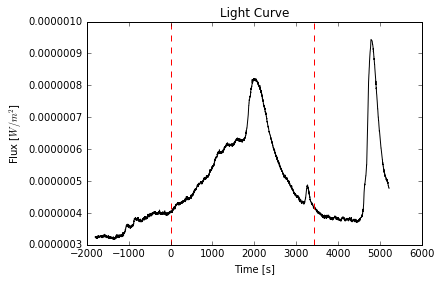

Is this an event? 1
128 /  200


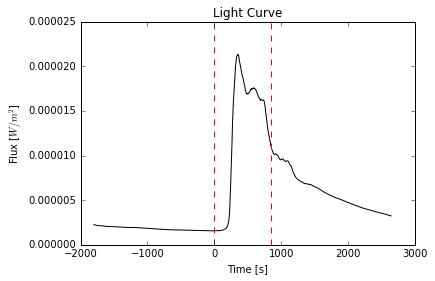

Is this an event? 1
129 /  200


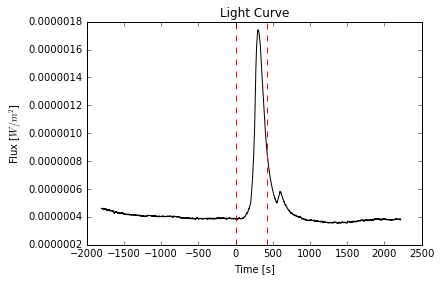

Is this an event? 1
130 /  200


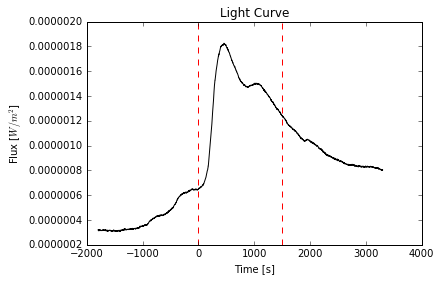

Is this an event? 1
131 /  200


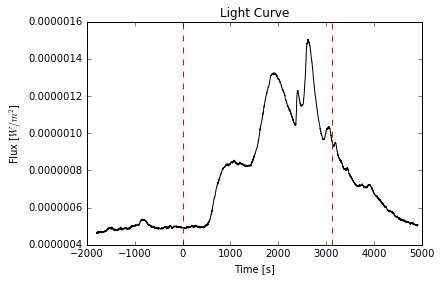

Is this an event? 1
132 /  200


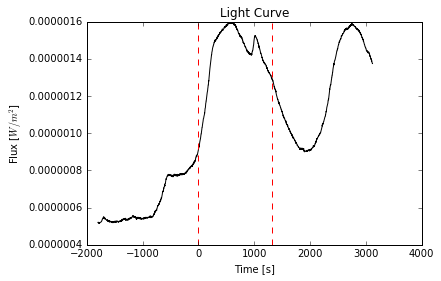

Is this an event? 1
133 /  200


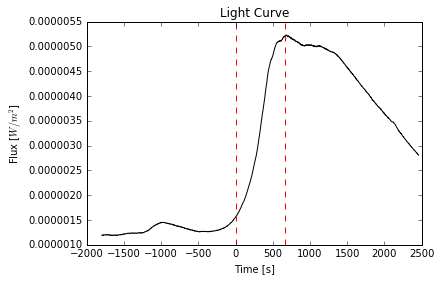

Is this an event? 3
Add note: eap
134 /  200


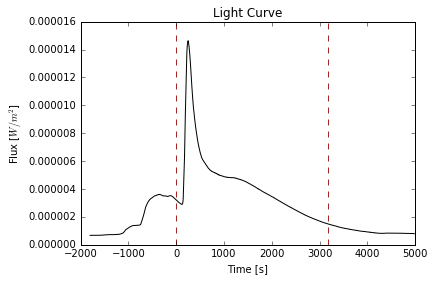

Is this an event? 1
135 /  200


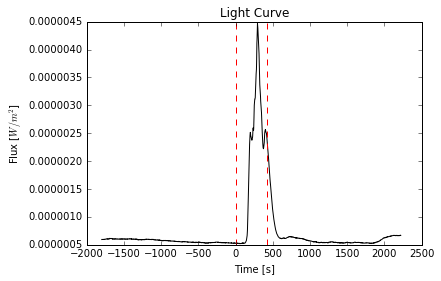

Is this an event? 1
136 /  200


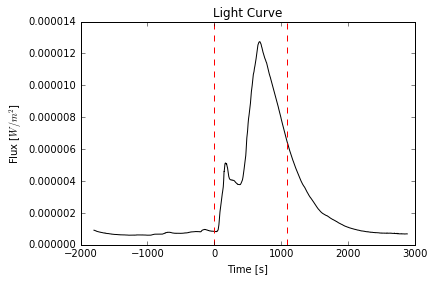

Is this an event? 1
137 /  200


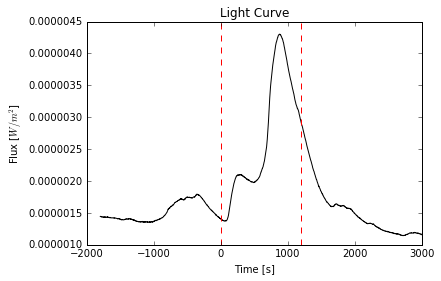

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
138 /  200


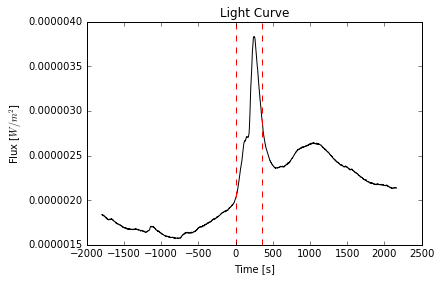

Is this an event? 1
139 /  200


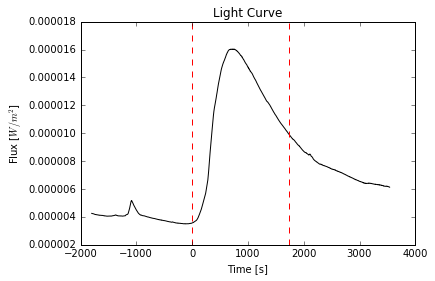

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
140 /  200


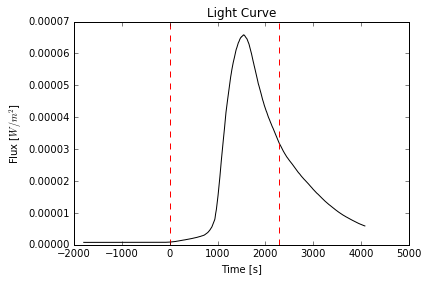

Is this an event? 1
141 /  200


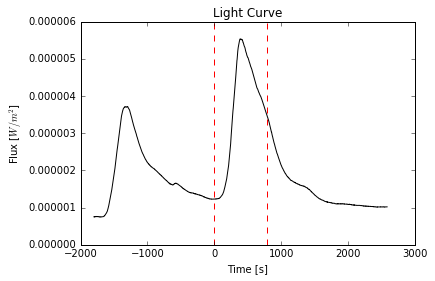

Is this an event? 1
142 /  200


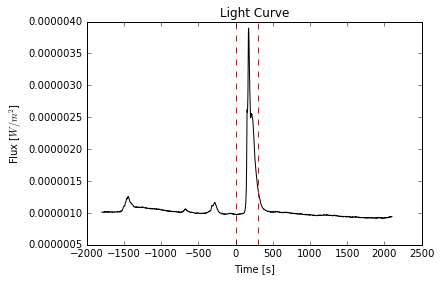

Is this an event? 1
143 /  200


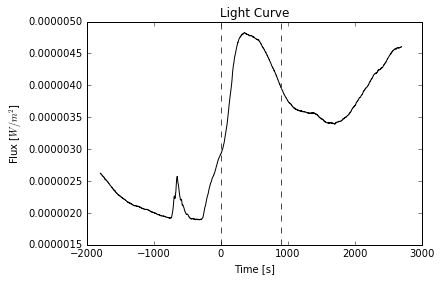

Is this an event? 1
144 /  200


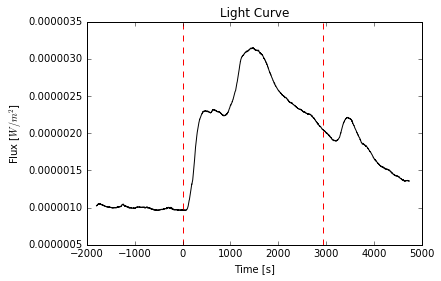

Is this an event? 1
145 /  200


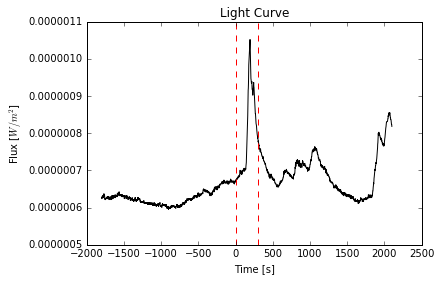

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
146 /  200


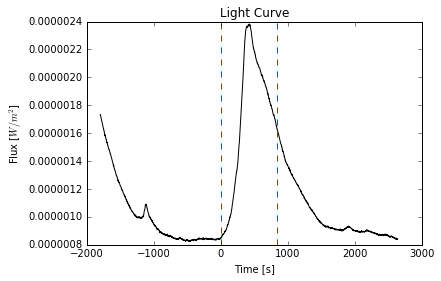

Is this an event? 1
147 /  200


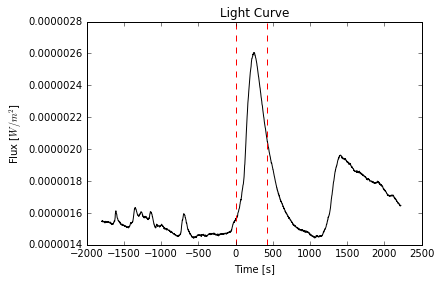

Is this an event? 1
148 /  200


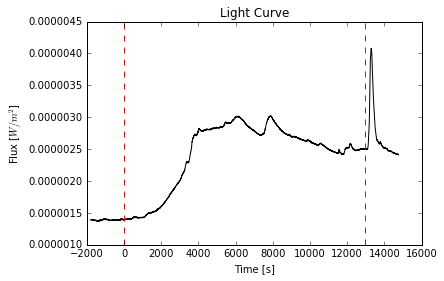

Is this an event? 2
149 /  200


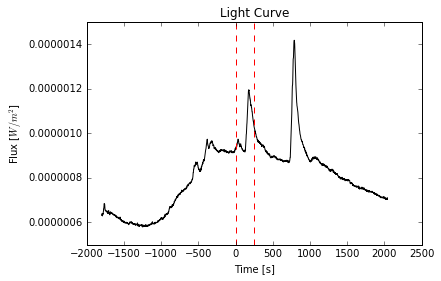

Is this an event? 1
150 /  200


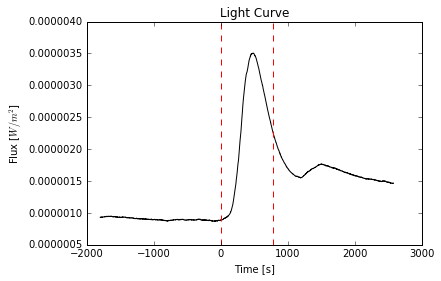

Is this an event? 1
151 /  200


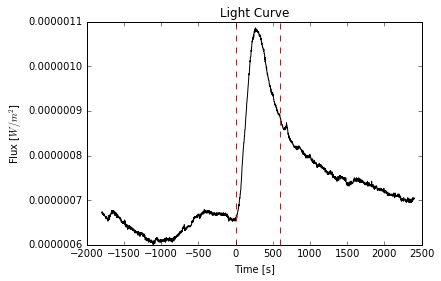

Is this an event? 1
152 /  200


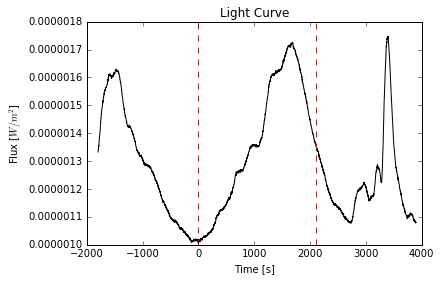

Is this an event? 1
153 /  200


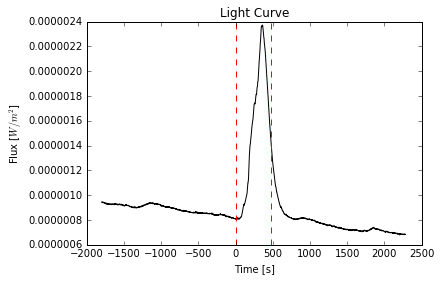

Is this an event? 1
154 /  200


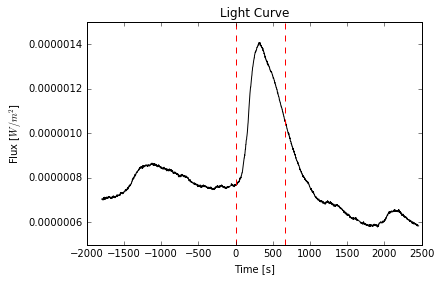

Is this an event? 1
155 /  200


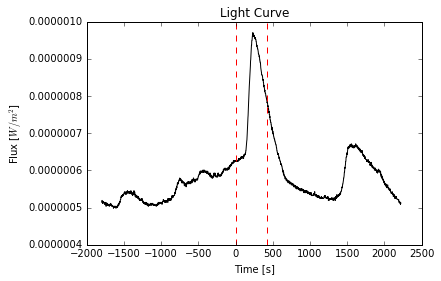

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
156 /  200


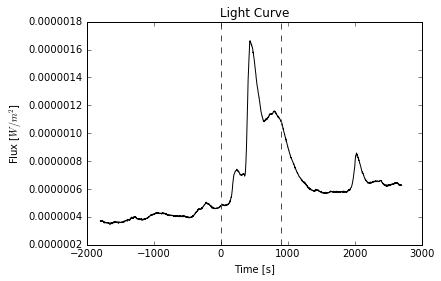

Is this an event? 1
157 /  200


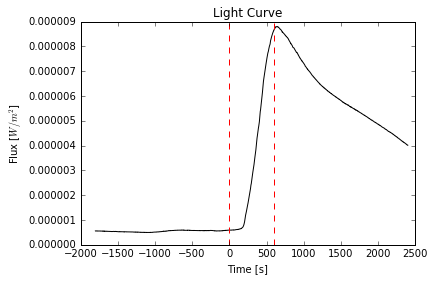

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 3
Add note: eap
158 /  200


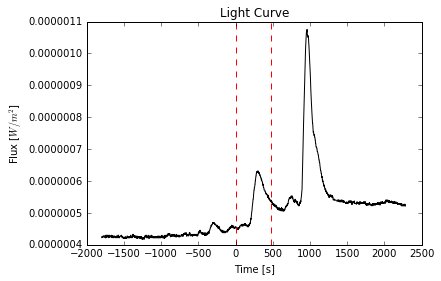

Is this an event? 1
159 /  200


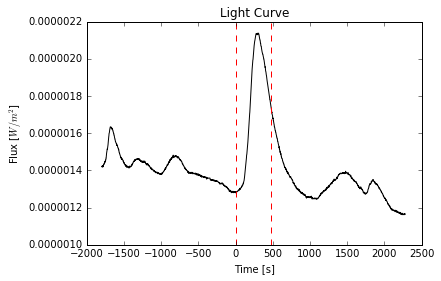

Is this an event? 1
160 /  200


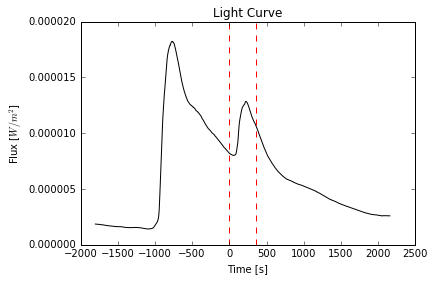

Is this an event? 3
Add note: yes but missed first half
161 /  200


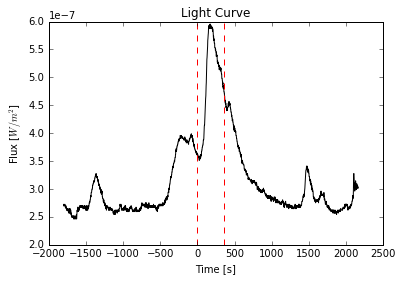

Is this an event? 1
162 /  200


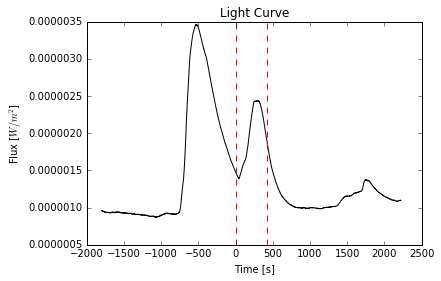

Is this an event? 3
Add note: yes but missing first (taller) half
163 /  200


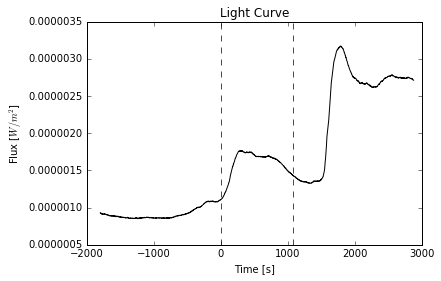

Is this an event? 2
164 /  200


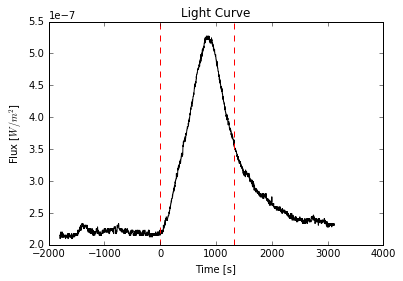

Is this an event? 1
165 /  200


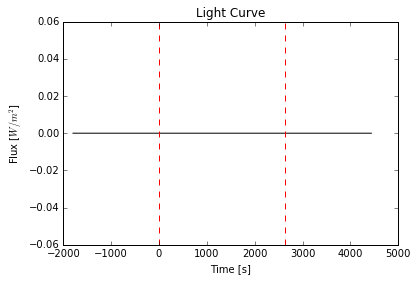

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 2
166 /  200


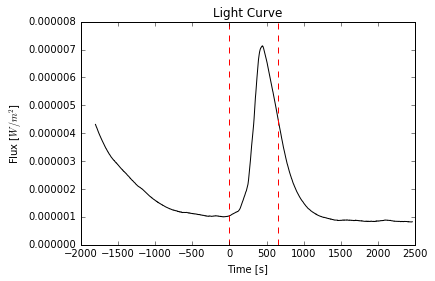

Is this an event? 1
167 /  200


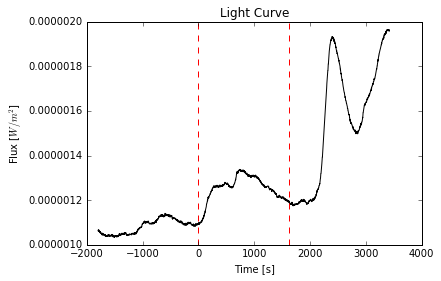

Is this an event? 2
168 /  200


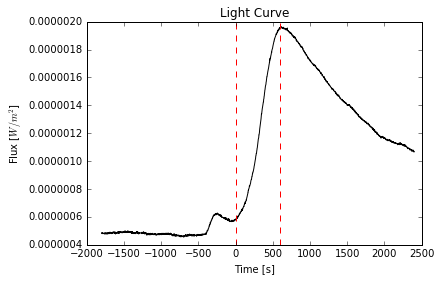

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! 

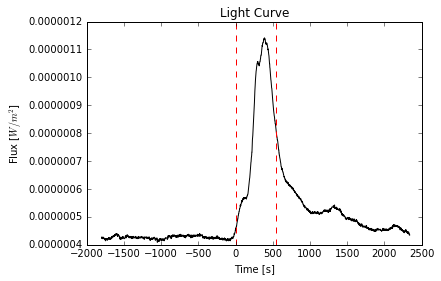

Is this an event? 1
170 /  200


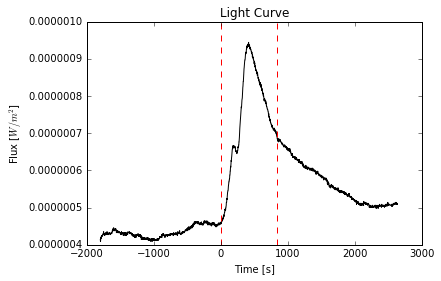

Is this an event? 1
171 /  200


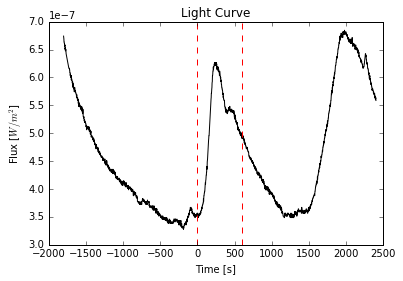

Is this an event? 1
172 /  200


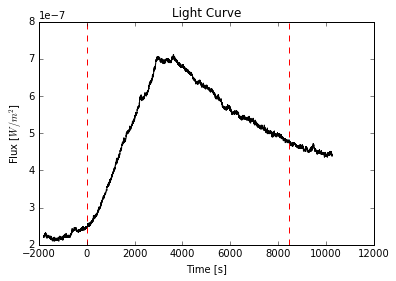

Is this an event? 1
173 /  200


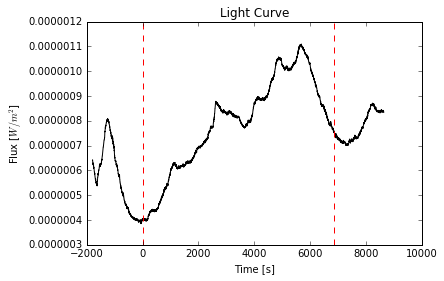

Is this an event? 1
174 /  200


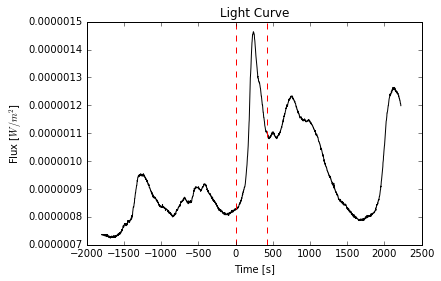

Is this an event? 1
175 /  200


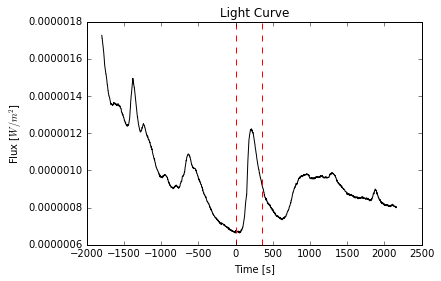

Is this an event? 1
176 /  200


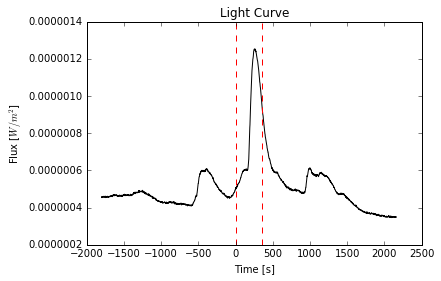

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
177 /  200


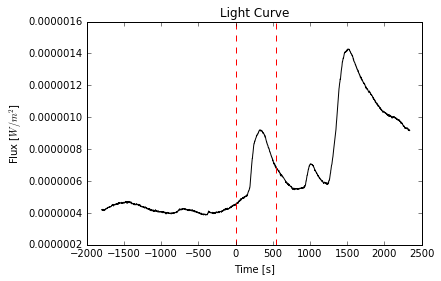

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
178 /  200


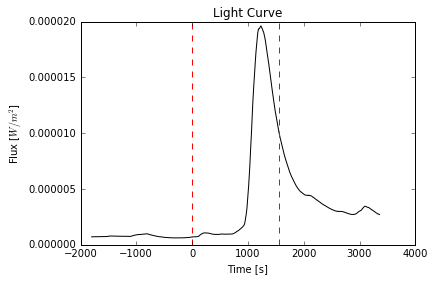

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
179 /  200


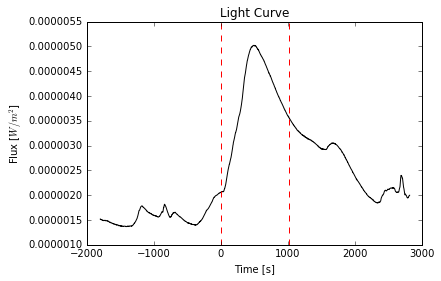

Is this an event? 1
180 /  200


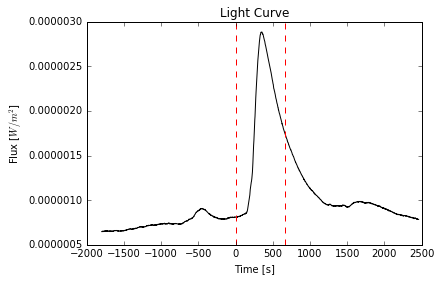

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
181 /  200


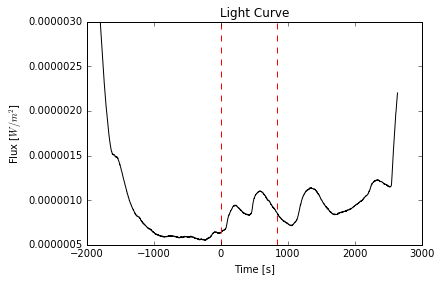

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 2
182 /  200


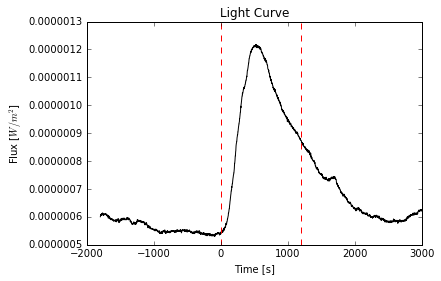

Is this an event? 1
183 /  200


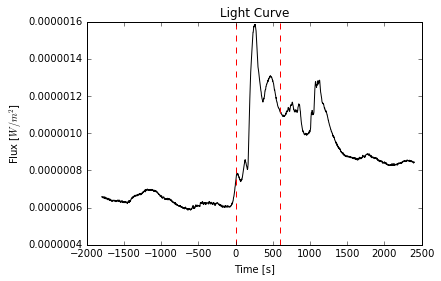

Is this an event? 1
184 /  200


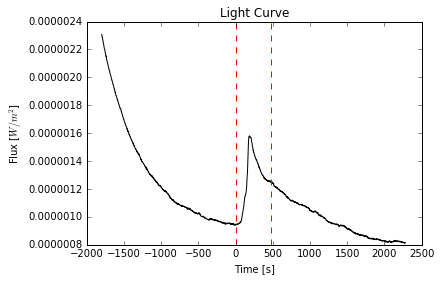

Is this an event? 1
185 /  200


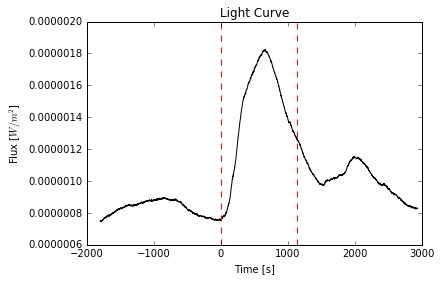

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
186 /  200


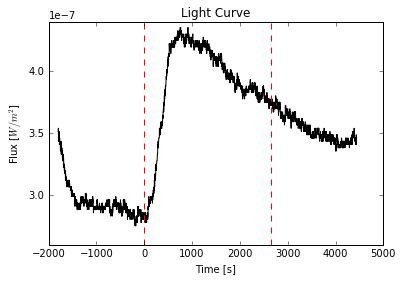

Is this an event? 1
187 /  200


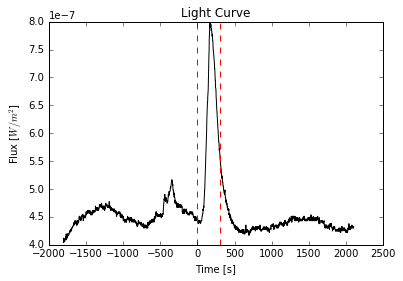

Is this an event? 1
188 /  200


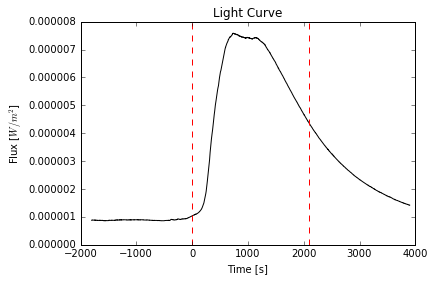

Is this an event? 1
189 /  200


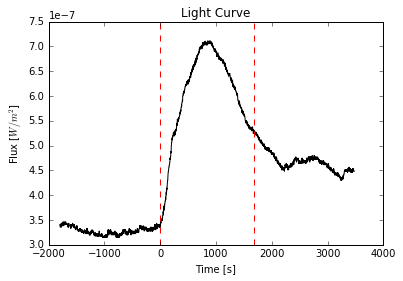

Is this an event? 1
190 /  200


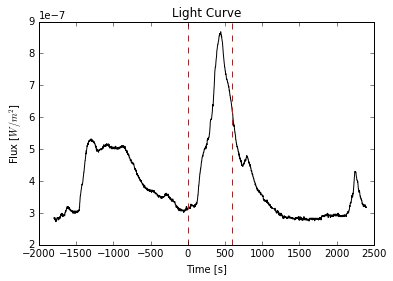

Is this an event? 1
191 /  200


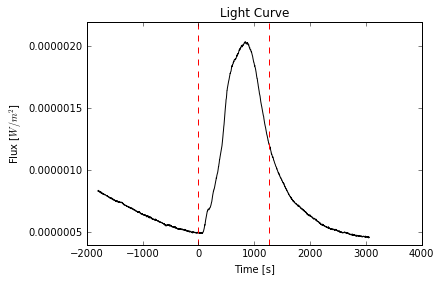

Is this an event? 1
192 /  200


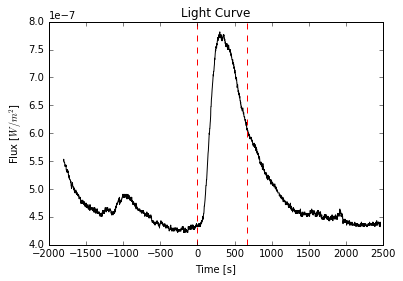

Is this an event? 1
193 /  200


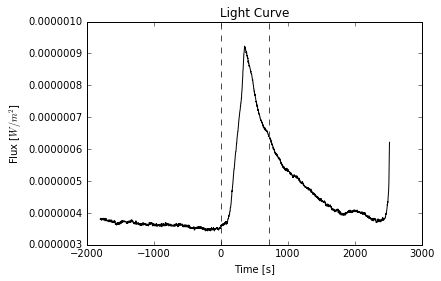

Is this an event? 1
194 /  200


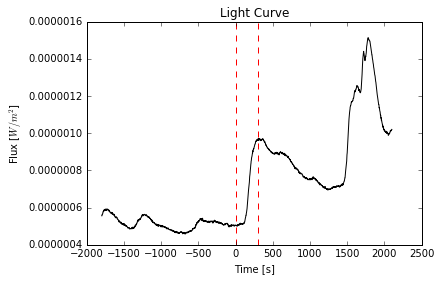

Is this an event? 3
Add note: eap
195 /  200


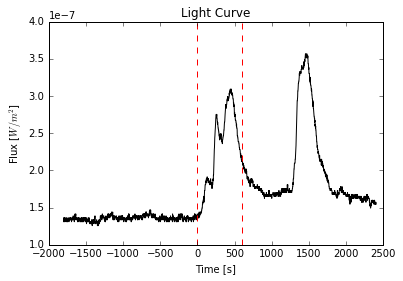

Is this an event? 1
196 /  200


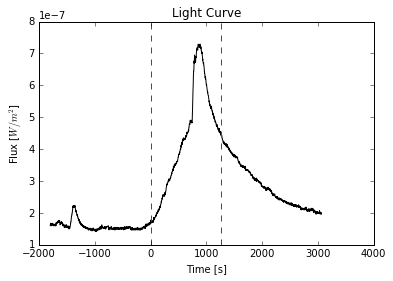

Is this an event? 1
197 /  200


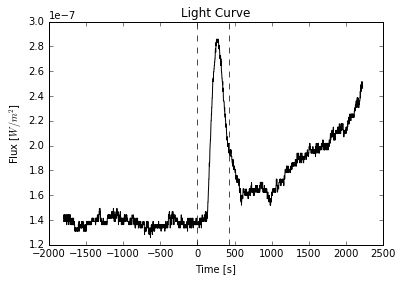

Is this an event? 1
198 /  200


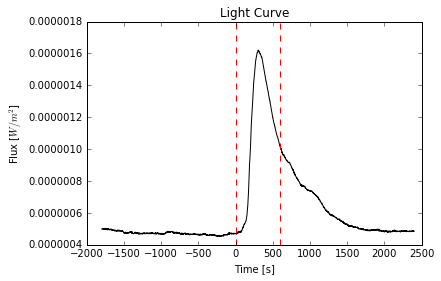

Is this an event? 1
199 /  200


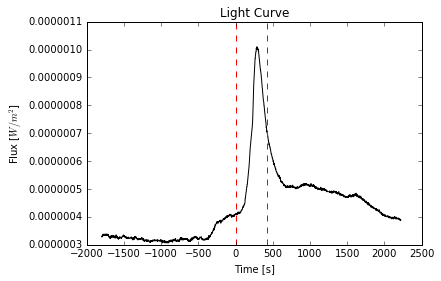

Is this an event? 
Oops! Not a valid response. Please try again.
Is this an event? 1
200 /  200


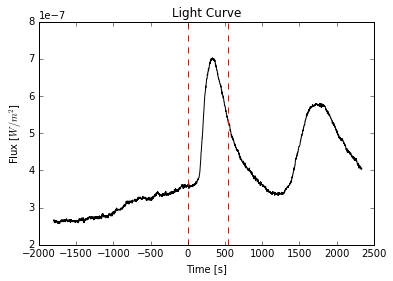

Is this an event? 1
201 /  200


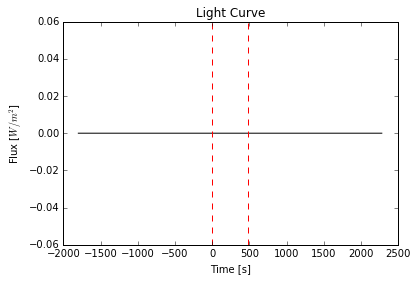

Is this an event? 2
202 /  200


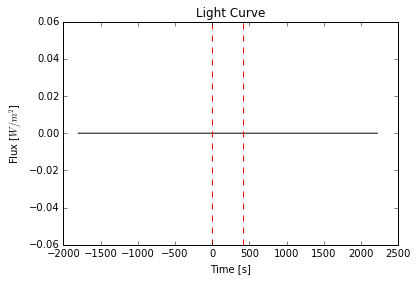

Is this an event? 2
203 /  200


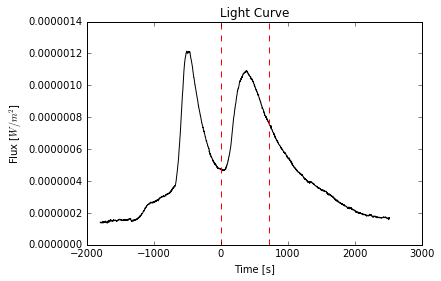

Is this an event? 1


In [62]:
create_test_set(200, events, lightcurve_goes, 30, 'tt_GOES')

In [ ]:








n = 200
skips_between_events = events.shape[0]/n
j = 0
for elem in events['event_starttime']:
    if j%skips_between_events==0:
        print j%skips_between_events
        axes = [('ax_goes1'), ('ax_goes2'), ('ax_131a'), ('ax_094a'), ('ax_335a'), ('ax_211a'), 
                    ('ax_193a'), ('ax_171a'), ('ax_304a')]
        f, axes = (plt.subplots(9, 1, sharex = 'col', figsize = (30,30)))
        plt.suptitle('Light Curve', fontsize = 30)
        yLabel = r'Flux [$W/m^2$]'

        # Fine-tune figure; make subplots close to each other and hide x ticks for
        # all but bottom plot.
        f.subplots_adjust(hspace=0.1)
        f.subplots_adjust(wspace=0.05)
        f.subplots_adjust(top=0.94)

        duration = events_ef['event_starttime'].values[j] - events_ef['ef_starttime'].values[j]
        graphend = events_ef['event_starttime'].values[j] + duration*0.5
    #     minutes = (graphend - elem).total_seconds()
        for i in range(1,10):
            if i==1 or i==2: lc = lightcurve_goes
            if i==3: lc = lightcurve131
            if i==4: lc = lightcurve94
            if i==5: lc = lightcurve335
            if i==6: lc = lightcurve211
            if i==7: lc = lightcurve193
            if i==8: lc = lightcurve171
            if i==9: lc = lightcurve304
            plt.subplot(9,1,i)
            lightcurve = get_relevant_lightcurve_AIA(elem, graphend, lc)
            length = lightcurve.shape[0]
            beginevent = 0
            endevent = 2*length/3 -1 
            indices = np.linspace(0, length, length)
            pctEvent = indices/length
            flux = map(float, lightcurve['DATAMEAN'].values)
#                 peakflux = events_ef['fl_peakflux_131'].values[j]
#                 percentflux = flux/peakflux
            silly = range(0, len(flux))
            plt.plot(pctEvent, flux)
            if i==0:
                plt.ylabel(yLabel, size = 'large')

            if i==9:
                plt.xticks([0, 0.666667], ('EF Event Start', 'Flare Start'), rotation = 45)
            else:plt.xticks([0, 0.666667])
            _ = plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
        plt.show()
        j+=1
